In [315]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [3]:
import Pkg; Pkg.add("SymPy")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Latexify ── v0.16.3
   Installed SymPyCore ─ v0.1.17
    Updating `/mhome/damtp/s/jm2386/Active_Lattice/Project.toml`
  [24249f21] + SymPy v2.0.1
    Updating `/mhome/damtp/s/jm2386/Active_Lattice/Manifest.toml`
  [3709ef60] + CommonEq v0.2.1
  [1fa38f19] + Format v1.3.7
  [23fbe1c1] + Latexify v0.16.3
  [24249f21] + SymPy v2.0.1
  [458b697b] + SymPyCore v0.1.17
Precompiling project...
  ✓ CommonEq
  ✓ Format
  ✓ Latexify
  ✓ SymPyCore
  ✓ SymPy
  ✓ Roots → RootsSymPyExt
  6 dependencies successfully precompiled in 72 seconds. 236 already precompiled. 4 skipped during auto due to previous errors.


In [15]:
using SymPy
const sympy_parsing_mathematica = SymPy.PyCall.pyimport("sympy.parsing.mathematica")

PyObject <module 'sympy.parsing.mathematica' from '/usr/lib/python3/dist-packages/sympy/parsing/mathematica.py'>

In [63]:
mathematica2julia(s::AbstractString, substitutions::Pair{<:AbstractString,<:AbstractString}...) =
    SymPy.SymPyCore.walk_expression(Sym(sympy_parsing_mathematica["mathematica"](s,Dict(substitutions...))))

mathematica2julia (generic function with 1 method)

In [73]:
mathematica2julia("Log[Log[x]]")
mathematica2julia("3(x+y)")

KeyError: KeyError: key :boolalg not found

In [34]:
s = "Log[Log[x]]"
symbol_ex = Sym(sympy_parsing_mathematica.mathematica(s))
julia_ex = SymPy.SymPyCore.convert_expr(symbol_ex,use_julia_code=true)

:(log(log(x)))

In [74]:
s = "1/Sqrt[(x+y)^3]"
symbol_ex = Sym(sympy_parsing_mathematica.mathematica(s))
f_expr = SymPy.SymPyCore.walk_expression(symbol_ex, fns=Dict("Pow"=>:^))
# :(((x + y) ^ 3) ^ -1//2)
# @generated ftest(x,y) = f_expr
# ftest(1,0)
# 1.

KeyError: KeyError: key :boolalg not found

In [32]:
f(0.1)

:(log(log(x)))

In [76]:
import Pkg; Pkg.add("WolframExpr")

   Resolving package versions...
   Installed WolframExpr ─ v1.0.1
   Installed MathLink ──── v0.5.5
   Installed SyntaxTree ── v1.0.1
    Updating `/mhome/damtp/s/jm2386/Active_Lattice/Project.toml`
  [3b1d5462] + WolframExpr v1.0.1
    Updating `/mhome/damtp/s/jm2386/Active_Lattice/Manifest.toml`
⌅ [18c93696] + MathLink v0.5.5
  [a4af3ec5] + SyntaxTree v1.0.1
  [3b1d5462] + WolframExpr v1.0.1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
    Building MathLink → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/2883415fdc6db2d33640737bef634915c4a23c5d/build.log`
Precompiling project...
  ✓ MathLink
  ✓ SyntaxTree
  ✓ WolframExpr
  3 dependencies successfully precompiled in 34 seconds. 242 already precompiled. 4 skipped during auto due to previous errors.


In [79]:
using WolframExpr
sym_f = string_to_function("10 x /Sqrt[(x+y)^3]", [:x, :y]);



In [85]:
x, y = 3, 0.1
sym_f(x, y) - 10*x/sqrt((x+y)^3)

-8.881784197001252e-16

In [104]:
str_w_max = "(-2*p^2*w - 4*ds*p^2*w)/3 + (-(p^5*(4*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w + 4*(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^3 + 6*(3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^5)) - (p^6*(2*p^4*(4*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w + 4*(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^3 + 6*(3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^5)*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6) - 24*(1 + 2*ds)*p^2*w*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^2 - 24*(1 + 2*ds)*w*(2 + (1 + 2*ds)*w^2)^2*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3))/(2*Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)]))/(9*2^(1/3)*(-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) - Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)])^(2/3)) + (-(p^5*(4*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w + 4*(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^3 + 6*(3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^5)) + (p^6*(2*p^4*(4*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w + 4*(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^3 + 6*(3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^5)*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6) - 24*(1 + 2*ds)*p^2*w*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^2 - 24*(1 + 2*ds)*w*(2 + (1 + 2*ds)*w^2)^2*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3))/(2*Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)]))/(9*2^(1/3)*(-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) + Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)])^(2/3))"

"(-2*p^2*w - 4*ds*p^2*w)/3 + (-(p^5*(4*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w + 4*(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^3 + 6*(3 +" ⋯ 3521 bytes ⋯ "pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)])^(2/3))"

In [142]:
sym_f = string_to_function(str_w_max, [:p, :pa, :Pe, :w, :ds, :dds]);

In [143]:
ϕ, ϕa, v0, w = 0.7, 0.5, 7.5, 0.1
sym_f(Complex(ϕ), Complex(ϕa), Complex(v0), Complex(w), ds(ϕ), dsp(ϕ))

-0.02740375087688632 - 0.04062103209133395im

In [173]:
stab_str = "(-2*p^2 - p^2*w^2 - 2*ds*p^2*w^2)/3 + 
(
  -1/3*(-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
         (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) - 
      Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + 
                  dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)])^(1/3)/2^(1/3) - 
  (-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
        (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) + 
     Sqrt[p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + 
                 dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3)])^(1/3)/(3*2^(1/3)))/2"
stab_f = string_to_function(stab_str, [:p, :pa, :Pe, :w, :ds, :dds]);        

In [147]:
ϕ, ϕa, v0, w = 0.7, 0.5, 7.5, 0.1
stab_f(Complex(ϕ), Complex(ϕa), Complex(v0), Complex(w), ds(ϕ), dsp(ϕ))

-0.666611797996862 + 0.23991623839068565im

In [170]:
u1_str = "(-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) + 
(p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
   (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 
4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3))^(1/2))/54"
u1 = string_to_function(u1_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

u2_str = "(-(p^5*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
(2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)) - 
(p^6*(p^4*(24*p + 2*(2*(8 + 17*ds)*p + (ds*(-1 + p)*pa + dds*(-1 + p)*p*pa + ds^2*(-p + pa))*Pe^2)*w^2 + 
   (2*(8 + ds*(58 + 33*ds))*p - (2*(-13 + ds)*ds^2*p + (ds + ds^2 - 2*ds^3 + (-dds + ds)*(-1 + 25*ds)*p + dds*(-1 + 25*ds)*p^2)*pa)*Pe^2)*w^4 + (3 + 2*ds*(8 + ds*(29 + 11*ds)))*p*w^6)^2 - 
4*(2 + (1 + 2*ds)*w^2)^3*(-3 + p^2*(2 + (1 + 2*ds)*w^2))^3))^(1/2))/54"
u2 = string_to_function(u2_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

In [200]:
ϕ, ϕa, v0, w = 0.7, 0.5, 7.5, 0.1
ds(ϕ), dsp(ϕ)
u1(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))

0.06322510453798301

In [181]:
ϕ, ϕa, v0, w = 0.7, 0.5, 7.5, 0.1
u2(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))

-0.17008931127734367 - 0.0im

In [209]:
#check complex
discriminant_str = "(p^9*(-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w^2 - 
(-1 + ds)^2*p*w^4)^3)/729 + 
(2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
 dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
 dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))^2/2916"
discriminant_f = string_to_function(discriminant_str, [:p, :pa, :Pe, :w, :ds, :dds]);
ϕ, ϕa, v0, w = 0.7, 0.3, 7.5, 0.1
discriminant_f(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))

3.726794062155342e-7

In [221]:
u1_str = "(-2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 + 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
 dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) - 
27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
 dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))/54 + 
Sqrt[(p^9*(-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w^2 - 
   (-1 + ds)^2*p*w^4)^3)/729 + 
(2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
   (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
    dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
    dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))^2/2916]"
u1 = string_to_function(u1_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

u2_str = "(-2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 + 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
 dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) - 
27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
 dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))/54 - 
Sqrt[(p^9*(-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w^2 - 
   (-1 + ds)^2*p*w^4)^3)/729 + 
(2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
   (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
    dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
    dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))^2/2916]"
u2 = string_to_function(u2_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

ϕ, ϕa, v0, w = 0.7, 0.3, 7.5, 0.1
uu1 = u1(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
uu2 = u2(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
shift_str = "(-2*p^2 - p^2*w^2 - 2*ds*p^2*w^2)/3"
shift_fn = string_to_function(shift_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

function re_eigen_f(ϕ, ϕa, v0, w, ds, dsp)
   return ( -(cbrt(u1(ϕ, ϕa, v0, w, ds, dsp))+cbrt(u2(ϕ, ϕa, v0, w, ds, dsp)))/2 + shift_fn(ϕ, ϕa, v0, w, ds, dsp))/ϕ^2
end
ϕ, ϕa, v0, w = 0.7, 0.3, 7.5, 0.1
re_eigen_f(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))

-0.0022433657419261596

In [198]:
ϕ, ϕa, v0, w = 0.7, 0.5, 7.5, 0.1
uu1 = u1(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
uu2 = u2(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
shift_str = "(-2*p^2 - p^2*w^2 - 2*ds*p^2*w^2)/3"
shift_fn = string_to_function(shift_str, [:p, :pa, :Pe, :w, :ds, :dds]); 
shift = shift_fn(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
re_lamb = ((-1/2)*( cbrt(real(uu1))+cbrt(real(uu2)) )+ shift)/ϕ^2

-0.5123769051905872

In [194]:
# ω, λ, λv = lin_pert_values(param)
param = get_grid_param(12,4)

param["ϕa"] = 0.3
param["ϕp"] = 0.6
param["Lx"] = 2.0
param["v0"] = 20.0
param["Δx"] = param["Lx"]/param["Nx"]


function relamb(x,y; L = 2, v = 7.5, param = param)
    param["ϕa"] = x
    param["ϕp"] = y
    param["Lx"] = L
    param["v0"] = v
    ω, λ, λv = lin_pert_values(param)
    return real(λ)
end

relamb (generic function with 1 method)

In [222]:
relamb(ϕa,ϕ-ϕa; L = 2*π/w, v = v0, param = param)

-0.0022433657419262242

In [224]:
u1dw_str = "(-6*(2*p^2*w + 4*ds*p^2*w)*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^2 + 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
(4*p^4*w + 4*ds*p^4*w + 2*ds^2*p^4*Pe^2*w + 2*ds*p^3*pa*Pe^2*w - 2*ds^2*p^3*pa*Pe^2*w + 
 2*dds*p^4*pa*Pe^2*w - 2*ds*p^4*pa*Pe^2*w - 2*dds*p^5*pa*Pe^2*w + 8*ds*p^4*w^3 + 4*ds^2*p^4*w^3) + 
9*(2*p^2*w + 4*ds*p^2*w)*(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - 
 ds^2*p^3*pa*Pe^2*w^2 + dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 
 2*ds*p^4*w^4 + ds^2*p^4*w^4) - 27*(8*ds*p^6*w^3 + 4*ds^2*p^6*Pe^2*w^3 + 4*dds*ds*p^6*pa*Pe^2*w^3 - 
 4*ds^2*p^6*pa*Pe^2*w^3 - 4*dds*ds*p^7*pa*Pe^2*w^3 + 6*ds^2*p^6*w^5))/54 + 
((p^9*(2*(-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w - 
  4*(-1 + ds)^2*p*w^3)*
 (-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w^2 - 
   (-1 + ds)^2*p*w^4)^2)/243 + ((6*(2*p^2*w + 4*ds*p^2*w)*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^2 - 
  9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*(4*p^4*w + 4*ds*p^4*w + 2*ds^2*p^4*Pe^2*w + 
    2*ds*p^3*pa*Pe^2*w - 2*ds^2*p^3*pa*Pe^2*w + 2*dds*p^4*pa*Pe^2*w - 2*ds*p^4*pa*Pe^2*w - 
    2*dds*p^5*pa*Pe^2*w + 8*ds*p^4*w^3 + 4*ds^2*p^4*w^3) - 9*(2*p^2*w + 4*ds*p^2*w)*
   (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
    dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(8*ds*p^6*w^3 + 4*ds^2*p^6*Pe^2*w^3 + 4*dds*ds*p^6*pa*Pe^2*w^3 - 4*ds^2*p^6*pa*Pe^2*w^3 - 
    4*dds*ds*p^7*pa*Pe^2*w^3 + 6*ds^2*p^6*w^5))*(2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 
  9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + 
    ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - 
    dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
    dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6)))/1458)/
(2*Sqrt[(p^9*(-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*
      w^2 - (-1 + ds)^2*p*w^4)^3)/729 + 
 (2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
     (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
      dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + 
      ds^2*p^4*w^4) + 27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - 
      ds^2*p^6*pa*Pe^2*w^4 - dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))^2/2916])"
u1dw = string_to_function(u1dw_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

u2dw_str = "(-6*(2*p^2*w + 4*ds*p^2*w)*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^2 + 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
(4*p^4*w + 4*ds*p^4*w + 2*ds^2*p^4*Pe^2*w + 2*ds*p^3*pa*Pe^2*w - 2*ds^2*p^3*pa*Pe^2*w + 
 2*dds*p^4*pa*Pe^2*w - 2*ds*p^4*pa*Pe^2*w - 2*dds*p^5*pa*Pe^2*w + 8*ds*p^4*w^3 + 4*ds^2*p^4*w^3) + 
9*(2*p^2*w + 4*ds*p^2*w)*(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - 
 ds^2*p^3*pa*Pe^2*w^2 + dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 
 2*ds*p^4*w^4 + ds^2*p^4*w^4) - 27*(8*ds*p^6*w^3 + 4*ds^2*p^6*Pe^2*w^3 + 4*dds*ds*p^6*pa*Pe^2*w^3 - 
 4*ds^2*p^6*pa*Pe^2*w^3 - 4*dds*ds*p^7*pa*Pe^2*w^3 + 6*ds^2*p^6*w^5))/54 - 
((p^9*(2*(-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w - 
  4*(-1 + ds)^2*p*w^3)*
 (-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*w^2 - 
   (-1 + ds)^2*p*w^4)^2)/243 + ((6*(2*p^2*w + 4*ds*p^2*w)*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^2 - 
  9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*(4*p^4*w + 4*ds*p^4*w + 2*ds^2*p^4*Pe^2*w + 
    2*ds*p^3*pa*Pe^2*w - 2*ds^2*p^3*pa*Pe^2*w + 2*dds*p^4*pa*Pe^2*w - 2*ds*p^4*pa*Pe^2*w - 
    2*dds*p^5*pa*Pe^2*w + 8*ds*p^4*w^3 + 4*ds^2*p^4*w^3) - 9*(2*p^2*w + 4*ds*p^2*w)*
   (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
    dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(8*ds*p^6*w^3 + 4*ds^2*p^6*Pe^2*w^3 + 4*dds*ds*p^6*pa*Pe^2*w^3 - 4*ds^2*p^6*pa*Pe^2*w^3 - 
    4*dds*ds*p^7*pa*Pe^2*w^3 + 6*ds^2*p^6*w^5))*(2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 
  9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*(2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + 
    ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - 
    dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + ds^2*p^4*w^4) + 
  27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - ds^2*p^6*pa*Pe^2*w^4 - 
    dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6)))/1458)/
(2*Sqrt[(p^9*(-4*p + (-2*(-1 + ds)*p + 3*(ds^2*p - (ds^2 + ds*(-1 + p) + dds*(-1 + p)*p)*pa)*Pe^2)*
      w^2 - (-1 + ds)^2*p*w^4)^3)/729 + 
 (2*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)^3 - 9*(2*p^2 + p^2*w^2 + 2*ds*p^2*w^2)*
     (2*p^4*w^2 + 2*ds*p^4*w^2 + ds^2*p^4*Pe^2*w^2 + ds*p^3*pa*Pe^2*w^2 - ds^2*p^3*pa*Pe^2*w^2 + 
      dds*p^4*pa*Pe^2*w^2 - ds*p^4*pa*Pe^2*w^2 - dds*p^5*pa*Pe^2*w^2 + 2*ds*p^4*w^4 + 
      ds^2*p^4*w^4) + 27*(2*ds*p^6*w^4 + ds^2*p^6*Pe^2*w^4 + dds*ds*p^6*pa*Pe^2*w^4 - 
      ds^2*p^6*pa*Pe^2*w^4 - dds*ds*p^7*pa*Pe^2*w^4 + ds^2*p^6*w^6))^2/2916])"
u2dw = string_to_function(u2dw_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

shiftdw_str = "(-2*p^2*w - 4*ds*p^2*w)/3"
shiftdw = string_to_function(shiftdw_str, [:p, :pa, :Pe, :w, :ds, :dds]); 

In [290]:
function Dw(ϕ, ϕa, v0, w, ds, dsp)
    if discriminant_f(ϕ, ϕa, v0, w, ds, dsp) ≥ 0
        return (-(  u1dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u1(ϕ, ϕa, v0, w, ds, dsp))^(-2)+  u2dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u2(ϕ, ϕa, v0, w, ds, dsp))^(-2)    )/6 + shiftdw(ϕ, ϕa, v0, w, ds, dsp))/ϕ^2
    else
        vars = complex.([ϕ, ϕa, v0, w, ds, dsp])
        return real( (-(  u1dw(vars...)*(u1(vars...))^(-2/3)+  u2dw(vars...)*(u2(vars...))^(-2/3)    )/6 + shiftdw(vars...))/ϕ^2 )
    end
end
function Dw2(ϕ, ϕa, v0, w, ds, dsp)
    if discriminant_f(ϕ, ϕa, v0, w, ds, dsp) ≥ 0
        return (-(  u1dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u1(ϕ, ϕa, v0, w, ds, dsp))^(-2)+  u2dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u2(ϕ, ϕa, v0, w, ds, dsp))^(-2)    )/6 + shiftdw(ϕ, ϕa, v0, w, ds, dsp))/ϕ^2
    else
        vars = complex.([ϕ, ϕa, v0, w, ds, dsp])
        z = (1-sqrt(3)*im)/2
        return real( ( (  u1dw(vars...)*(u1(vars...))^(-2/3)+  u2dw(vars...)*(u2(vars...))^(-2/3)    )/3 + shiftdw(vars...))/ϕ^2 )
    end
end
# function Dw3(ϕ, ϕa, v0, w, ds, dsp)
#     if discriminant_f(ϕ, ϕa, v0, w, ds, dsp) ≥ 0
#         return (-(  u1dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u1(ϕ, ϕa, v0, w, ds, dsp))^(-2)+  u2dw(ϕ, ϕa, v0, w, ds, dsp)*cbrt(u2(ϕ, ϕa, v0, w, ds, dsp))^(-2)    )/6 + shiftdw(ϕ, ϕa, v0, w, ds, dsp))/ϕ^2
#     else
#         vars = complex.([ϕ, ϕa, v0, w, ds, dsp])
#         z = (1-sqrt(3)*im)/2
#         return real( (-(  u1dw(vars...)*(u1(vars...))^(-2/3)+  u2dw(vars...)*(u2(vars...))^(-2/3)    )/6 + shiftdw(vars...))/ϕ^2 )
#     end
# end
ϕ, ϕa, v0, w = 0.7, 0.3, 7.5, 0.1
Dw(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
# u1dw(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ)),u2dw(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))

-0.0446157049416739

In [289]:
complex(-1)^(-2/3)

-0.4999999999999999 - 0.8660254037844387im

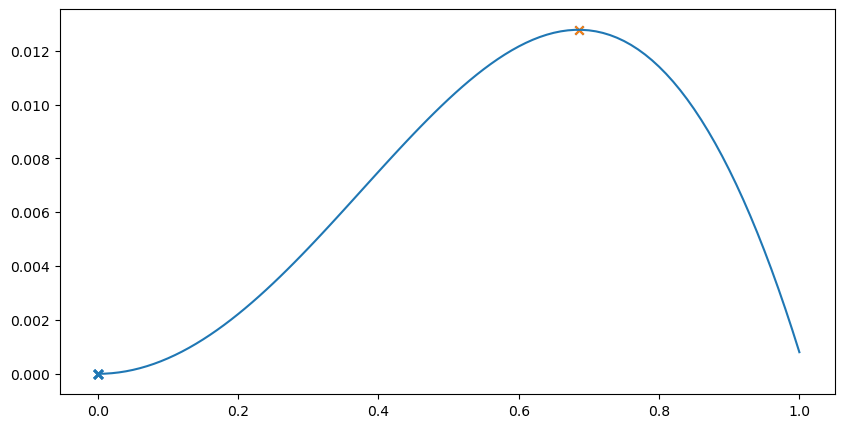

In [320]:
ϕ, ϕa, v0 = 0.7, 0.4, 7.5

using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
ws = collect(0.00:0.01:1)


λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)
ax.plot(ws,λs)

f(x) = Dw(ϕ, ϕa, v0, x, ds(ϕ), dsp(ϕ))
ws = find_zeros(f,(0,10))
λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)
ax.scatter(ws,λs; marker = "x")

f(x) = Dw2(ϕ, ϕa, v0, x, ds(ϕ), dsp(ϕ))
ws = find_zeros(f,(0,10))
λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)
ax.scatter(ws,λs; marker = "x")

display(fig)

In [321]:
is_stable_value(ϕa, ϕ -ϕa; Pe = v0)

0.012775371639640248